# CSC 325 Introduction to Machine Learning

## Homework 3: Logistic Regression and Support Vector Machine

**Instructor**: Dr. Junxiu Zhou

Note that, This is an Jupyter Notebook. When you execute code within the notebook, the results appear beneath the code.

Try executing this notebook cell-by-cell by clicking the Run button or by placing your cursor inside it and pressing Shift+Enter.

# Challenger USA Space Shuttle O-Ring Data Set
The motivation for collecting this database was the explosion of the USA Space Shuttle Challenger on 28 January, 1986. An investigation ensued into the reliability of the shuttle's propulsion system. The explosion was eventually traced to the failure of one of the three field joints on one of the two solid booster rockets. Each of these six field joints includes two O-rings, designated as primary and secondary, which fail when phenomena called erosion and blowby both occur.

The night before the launch a decision had to be made regarding launch safety. The discussion among engineers and managers leading to this decision included concern that the probability of failure of the O-rings depended on the temperature t at launch, which was forecase to be 31 degrees F. There are strong engineering reasons based on the composition of O-rings to support the judgment that failure probability may rise monotonically as temperature drops. One other variable, the pressure s at which safety testing for field join leaks was performed, was available, but its relevance to the failure process was unclear.

Draper's paper includes a menacing figure graphing the number of field joints experiencing stress vs. liftoff temperature for the 23 shuttle flights previous to the Challenger disaster. No previous liftoff temperature was under 53 degrees F. Although tremendous extrapolation must be done from the given data to assess risk at 31 degrees F, it is obvious even to the layman "to foresee the unacceptably high risk created by launching at 31 degrees F." For more information, see Draper (1993) or the other previous analyses.

The task of this project is to classify the data samples into different distress_ct status.


The original dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring.
![Large92.jpg](attachment:Large92.jpg)


In [98]:
# import packages
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
%matplotlib inline

##### Step 1: Loading the data

We will use the read_csv() function provided by pandas, then pass the file directory and file name as arugument to the function.

In [99]:
from google.colab import files
uploaded = files.upload()

In [100]:
data = pd.read_csv('challenger_LogisticRegression.csv')

##### Step 2: Observing the data using pandas functions

In [101]:
data.head()

,o_ring_ct,distress_ct,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [102]:
data.shape

(23, 5)

In [103]:
data.tail()

,o_ring_ct,distress_ct,temperature,pressure,launch_id
18,6,0,76,200,19
19,6,0,79,200,20
20,6,0,75,200,21
21,6,0,76,200,22
22,6,1,58,200,23


In [104]:
data.iloc[0]

o_ring_ct       6
distress_ct     0
temperature    66
pressure       50
launch_id       1
Name: 0, dtype: int64

In [105]:
data.columns

Index(['o_ring_ct', 'distress_ct', 'temperature', 'pressure', 'launch_id'], dtype='object')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   o_ring_ct    23 non-null     int64
 1   distress_ct  23 non-null     int64
 2   temperature  23 non-null     int64
 3   pressure     23 non-null     int64
 4   launch_id    23 non-null     int64
dtypes: int64(5)
memory usage: 1.0 KB


In [107]:
data.describe()

,o_ring_ct,distress_ct,temperature,pressure,launch_id
count,23.0,23.000000,23.000000,23.000000,23.00000
mean,6.0,0.260870,69.565217,152.173913,12.00000
std,0.0,0.448978,7.057080,68.221332,6.78233
min,6.0,0.000000,53.000000,50.000000,1.00000
25%,6.0,0.000000,67.000000,75.000000,6.50000
50%,6.0,0.000000,70.000000,200.000000,12.00000
75%,6.0,0.500000,75.000000,200.000000,17.50000
max,6.0,1.000000,81.000000,200.000000,23.00000


##### Step 3: Identifying the features X and label y
Note that, the challenger contains both features (i.e., o_ring_ct, temperature, pressure, and launch_id) and label (i.e., distress_ct). So we need to separate features as X, and label as y.

In fact we can remove the launch_id from the feature list.

In [108]:
X = data.drop("distress_ct", axis=1)

In [109]:
X.head()

,o_ring_ct,temperature,pressure,launch_id
0,6,66,50,1
1,6,70,50,2
2,6,69,50,3
3,6,68,50,4
4,6,67,50,5


In [110]:
y = data["distress_ct"]

In [111]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: distress_ct, dtype: int64

##### Step 4: Try to visualize your data
Since X and y are pandas dataframes, then we can directly plot it.
However, visualize the data may not very straighforward since the feature has 4-dimensions.

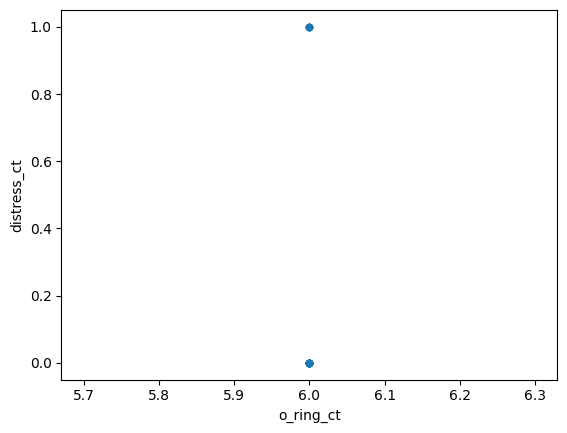

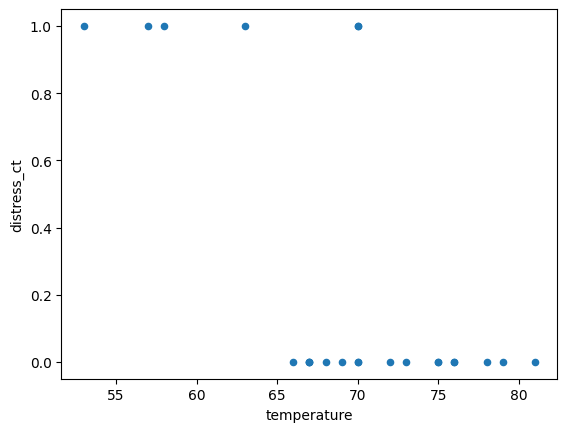

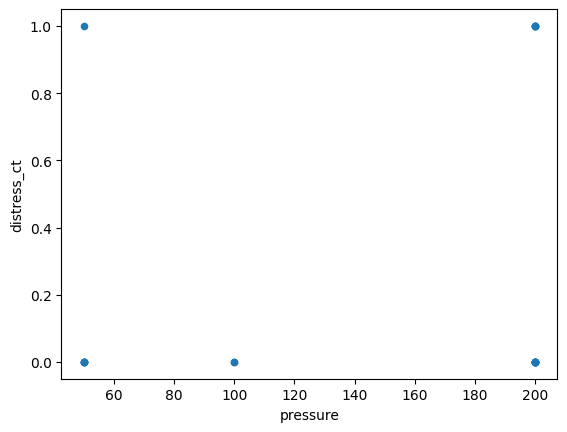

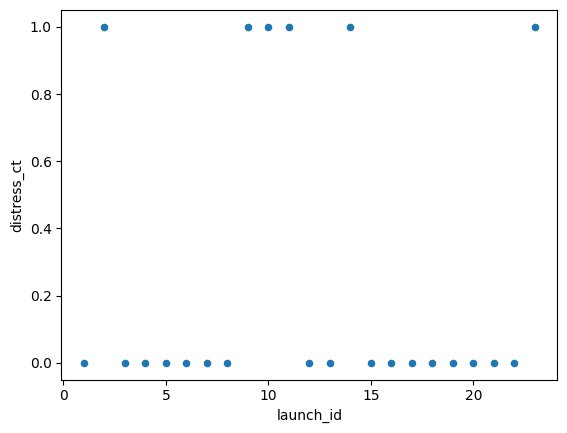

In [112]:
data.plot.scatter(x = "o_ring_ct", y = "distress_ct");
data.plot.scatter(x = "temperature", y = "distress_ct");
data.plot.scatter(x = "pressure", y = "distress_ct");
data.plot.scatter(x = "launch_id", y = "distress_ct");

##### Step 5: Splitting the data into training set and test set

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [114]:
print('The shape of X_train is ', X_train.shape)
print('The shape of y_train is ', y_train.shape)
print('\n\nThe shape of X_test is ', X_test.shape)
print('The shape of y_test is ', y_test.shape)

The shape of X_train is  (16, 4)
The shape of y_train is  (16,)


The shape of X_test is  (7, 4)
The shape of y_test is  (7,)


##### Step 6: Preprocessing the data using MinMaxScaler

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
print(X_train_scaled)

[[0.         0.65384615 0.33333333 0.28571429]
 [0.         0.76923077 0.33333333 0.23809524]
 [0.         0.38461538 1.         0.38095238]
 [0.         0.84615385 1.         0.66666667]
 [0.         0.57692308 0.         0.0952381 ]
 [0.         0.65384615 0.         0.        ]
 [0.         0.96153846 1.         0.47619048]
 [0.         1.         1.         0.85714286]
 [0.         0.84615385 1.         0.9047619 ]
 [0.         0.         1.         0.57142857]
 [0.         0.61538462 0.         0.04761905]
 [0.         0.53846154 1.         0.61904762]
 [0.         0.19230769 1.         1.        ]
 [0.         0.53846154 0.         0.14285714]
 [0.         0.88461538 1.         0.80952381]
 [0.         0.65384615 1.         0.42857143]]


In [117]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: distress_ct, dtype: int64

#### Logistical Regression Model

In [118]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [119]:
lr.score(X_train, y_train)

0.875

#### Result Analysis on test set

In [120]:
from sklearn.metrics import accuracy_score
acc_train1 = accuracy_score(y_train, lr.predict(X_train))
acc_test1 = accuracy_score(y_test, lr.predict(X_test))

In [121]:
print('The accuracy score for the training set is {:.3f}%'.format(acc_train1*100))

The accuracy score for the training set is 87.500%


In [122]:
print('The accuracy score for the test set is {:.3f}%'.format(acc_test1*100))

The accuracy score for the test set is 71.429%


**Two tips** to remember when performing logistic regression are that the data should be free of missing values and that all variables are independent of each other. There should also be sufficient data for each outcome value to ensure high accuracy. A good starting point would be approximately 30-50 data points for each outcome, i.e. 60-100 total data points for binary logistic regression.

# 2 SVM model

### 2.1 Linear SVM model

In [123]:
from sklearn.svm import SVC
lsvc = SVC(kernel="linear", C=5)
lsvc.fit(X_train, y_train)
acc_train2 = accuracy_score(y_train, lsvc.predict(X_train))
acc_test2 = accuracy_score(y_test, lsvc.predict(X_test))

In [124]:
print('Training accuracy of the Linear SVM model is {:.3f}%'.format(acc_train2*100))
print('Test accuracy of the Linear SVM model is {:.3f}%'.format(acc_test2*100))

Training accuracy of the Linear SVM model is 93.750%
Test accuracy of the Linear SVM model is 71.429%


### 2.2 SVM polynomial kernel

In [125]:
psvc = SVC(kernel="poly", degree=3, coef0=1, C=5)
psvc.fit(X_train, y_train)
acc_train3 = accuracy_score(y_train, psvc.predict(X_train))
acc_test3 = accuracy_score(y_test, psvc.predict(X_test))

In [126]:
print('Training accuracy of the SVM model is {:.3f}%'.format(acc_train3*100))
print('Test accuracy of the SVM model is {:.3f}%'.format(acc_test3*100))

Training accuracy of the SVM model is 87.500%
Test accuracy of the SVM model is 85.714%


### 2.3 SVM rbf kernel

In [127]:
rsvc = SVC(kernel="rbf", gamma=10, C=5)
rsvc.fit(X_train, y_train)
acc_train4 = accuracy_score(y_train, rsvc.predict(X_train))
acc_test4 = accuracy_score(y_test, rsvc.predict(X_test))

In [128]:
print('Training accuracy of the SVM model is {:.3f}%'.format(acc_train4*100))
print('Test accuracy of the SVM model is {:.3f}%'.format(acc_test4*100))

Training accuracy of the SVM model is 100.000%
Test accuracy of the SVM model is 85.714%


# Done!